In [1]:
print("Hello World!")

Hello World!


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [4]:
# load dataset (assumes file is in the notebook's working directory)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# quick checks
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
# check missing values for all columns
missing_counts = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

print("Missing value counts per column:\n", missing_counts)
print("\nMissing value % per column:\n", missing_percent)

# show only columns that have any missing values
cols_with_missing = missing_counts[missing_counts > 0].sort_values(ascending=False)
if not cols_with_missing.empty:
    print("\nColumns with missing values:\n", cols_with_missing)
else:
    print("\nNo missing values in any column.")

# show first few rows that contain any missing values (if any)
missing_rows = df[df.isnull().any(axis=1)]
if not missing_rows.empty:
    display(missing_rows.head())
else:
    print("\nNo rows with missing values found.")

# optional visual check (requires matplotlib and seaborn)
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
    plt.title("Missing values map")
    plt.show()
except Exception:
    pass


Missing value counts per column:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Missing value % per column:
 age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

No missing values in any column.

No rows with missing values found.


Using target column: DEATH_EVENT

Counts:
 DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Percentages:
 DEATH_EVENT
0    67.89
1    32.11
Name: proportion, dtype: float64


,count,percent
DEATH_EVENT,,
0,203,67.89
1,96,32.11


C:\Users\ROY\AppData\Local\Temp\ipykernel_17512\3418682781.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')


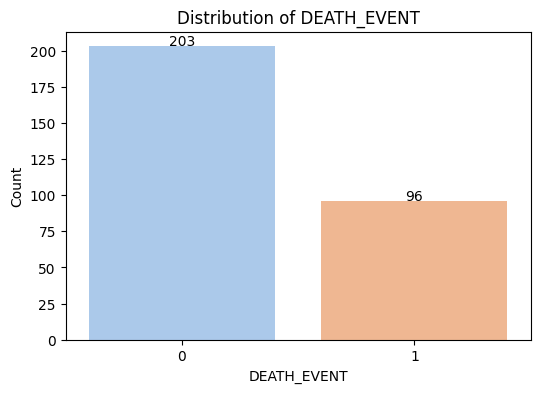

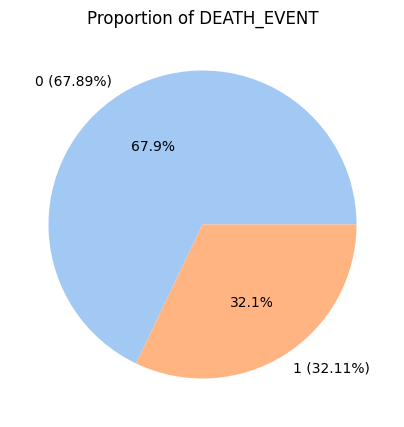

In [11]:
# Show the distribution of the target variable (Death Event)
# Automatically detect the target column (case-insensitive, contains 'death' and 'event')
target_candidates = [c for c in df.columns if 'death' in c.lower() and 'event' in c.lower()]
target = target_candidates[0] if target_candidates else ('DEATH_EVENT' if 'DEATH_EVENT' in df.columns else None)

if target is None:
    print('Target column not found. Available columns:', df.columns.tolist())
else:
    print(f"Using target column: {target}")
    counts = df[target].value_counts().sort_index()
    percents = (df[target].value_counts(normalize=True) * 100).sort_index().round(2)
    print('\nCounts:\n', counts)
    print('\nPercentages:\n', percents)
    # Display as a table
    try:
        display(pd.DataFrame({'count': counts, 'percent': percents}))
    except Exception:
        pass
    # Plot bar and pie chart
    try:
        import matplotlib.pyplot as plt
        import seaborn as sns
        plt.figure(figsize=(6, 4))
        sns.barplot(x=counts.index.astype(str), y=counts.values, palette='pastel')
        plt.xlabel(target)
        plt.ylabel('Count')
        plt.title('Distribution of ' + str(target))
        for i, v in enumerate(counts.values):
            plt.text(i, v + 0.5, str(v), ha='center')
        plt.show()
        plt.figure(figsize=(5, 5))
        plt.pie(counts.values, labels=[f"{int(i)} ({p}%)" for i, p in zip(counts.index, percents.values)], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
        plt.title('Proportion of ' + str(target))
        plt.show()
    except Exception as e:
        print('Plotting failed:', e)


In [12]:
X = df.drop(columns=[target]) if target else df.copy()
y = df[target] if target else None

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
6,75.000,1,246,0,15,0,127000.00,1.20,137,1,0,10
183,75.000,0,99,0,38,1,224000.00,2.50,134,1,0,162
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171
146,52.000,0,132,0,30,0,218000.00,0.70,136,1,1,112
30,94.000,0,582,1,38,1,263358.03,1.83,134,1,0,27


In [20]:
X_test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,1,250
265,50.0,1,298,0,35,0,362000.0,0.9,140,1,1,240
164,45.0,0,2442,1,30,0,334000.0,1.1,139,1,0,129
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10
77,42.0,0,102,1,40,0,237000.0,1.2,140,1,0,74


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [25]:
import joblib
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']